<a href="https://colab.research.google.com/github/economistaluana/Python/blob/main/Econometria/Sal%C3%A1rios/Regress%C3%A3o_m%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [ ]:
# Importando a base de dados

dados = pd.read_csv('/Salários e características.csv')

dados.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,1,0,0,1,0,0,0,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,5.30,12,7,2,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# Nova seção

In [ ]:
dados.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.357414,0.250951,0.228137,0.479087,0.199620,0.188213,0.085551,0.030418,0.013308,0.003802
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.479695,0.433973,0.420031,0.500038,0.400095,0.391254,0.279967,0.171899,0.114699,0.061604
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,1.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        526 non-null    float64
 1   educ        526 non-null    int64  
 2   exper       526 non-null    int64  
 3   tenure      526 non-null    int64  
 4   nonwhite    526 non-null    int64  
 5   female      526 non-null    int64  
 6   married     526 non-null    int64  
 7   numdep      526 non-null    int64  
 8   smsa        526 non-null    int64  
 9   northcen    526 non-null    int64  
 10  south       526 non-null    int64  
 11  west        526 non-null    int64  
 12  construc    526 non-null    int64  
 13  ndurman     526 non-null    int64  
 14  trcommpu    526 non-null    int64  
 15  trade       526 non-null    int64  
 16  services    526 non-null    int64  
 17  profserv    526 non-null    int64  
 18  profocc     526 non-null    int64  
 19  clerocc     526 non-null    i

In [ ]:
dados.isnull().sum()

,0
wage,0
educ,0
exper,0
tenure,0
nonwhite,0
female,0
married,0
numdep,0
smsa,0
northcen,0


In [ ]:
# Mostrando todas as linhas e colunas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

display(dados)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,male,solteira,hcasados,mcasadas,msolteiras,Dnumdep_0,Dnumdep_1,Dnumdep_2,Dnumdep_3,Dnumdep_4,Dnumdep_5,Dnumdep_6
0,3.10,11,2,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1.131402,4,0,0,1,0,0,1,0,0,1,0,0,0,0
1,3.24,12,22,2,0,1,1,3,1,0,0,1,0,0,0,0,1,0,0,0,1,1.175573,484,4,0,0,0,1,0,0,0,0,1,0,0,0
2,3.00,11,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1.098612,4,0,1,1,0,0,0,0,0,1,0,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.791759,1936,784,1,0,1,0,0,1,0,0,0,0,0,0
4,5.30,12,7,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.667707,49,4,1,0,1,0,0,0,1,0,0,0,0,0
5,8.75,16,9,8,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,2.169054,81,64,1,0,1,0,0,1,0,0,0,0,0,0
6,11.25,18,15,7,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,2.420368,225,49,1,1,0,0,0,1,0,0,0,0,0,0
7,5.00,12,5,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1.609438,25,9,0,1,0,0,1,1,0,0,0,0,0,0
8,3.60,12,26,4,0,1,0,2,1,0,0,1,0,0,0,1,0,0,1,0,0,1.280934,676,16,0,1,0,0,1,0,0,1,0,0,0,0
9,18.18,17,22,21,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2.900322,484,441,1,0,1,0,0,1,0,0,0,0,0,0


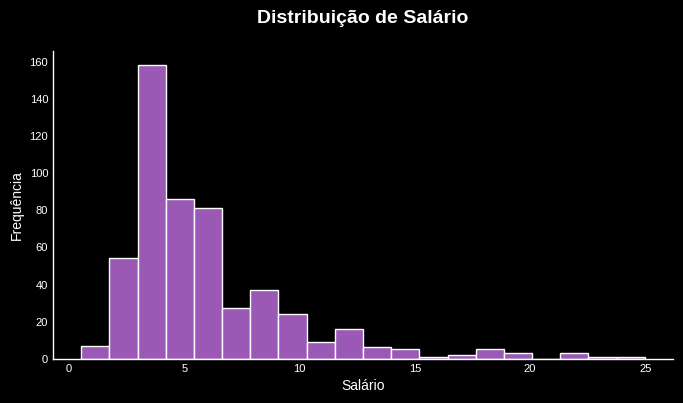

In [ ]:
# Gerando o histograma da variável dependente

from matplotlib import pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(8, 4))
dados['wage'].plot(kind='hist', bins=20, color='#9b59b6', edgecolor='white')
plt.title('Distribuição de Salário', fontsize=14, weight='bold', pad=20, color='white')
plt.xlabel('Salário', fontsize=10, color='white')
plt.ylabel('Frequência', fontsize=10, color='white')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=8, colors='white')
plt.show()

In [ ]:
# Declarando a variável dependente e as independentes

y = dados['wage']

x1 = dados[['educ', 'exper', 'female', 'nonwhite', 'msolteiras']]


In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     47.66
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.42e-40
Time:                        02:05:26   Log-Likelihood:                -1333.8
No. Observations:                 526   AIC:                             2680.
Df Residuals:                     520   BIC:                             2705.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9081      0.766     -2.490      0.0

In [ ]:
# Regressão múltipla com o Sklearn

from sklearn.linear_model import LinearRegression

In [ ]:
# Declarando as variáveis independentes e dependente

y = dados ['wage']
x = dados[['educ', 'exper', 'female', 'nonwhite', 'msolteiras']]

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.coef_

array([ 0.61129908,  0.06874877, -2.51454875, -0.16033595,  0.77104784])

In [ ]:
reg.intercept_

-1.9081479895291542

In [ ]:
# Calculando o R²

reg.score(x,y)

0.31426986497955856